In [15]:
from abel import HALHFv1, HALHFv2, Collider
from abel.classes.collider.preset.c3 import C3
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## HALHF version 1.0 (original paper)

In [2]:
halhf1 = HALHFv1()
halhf1.run('preset_example_HALHF1', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε = 159.7/0.6 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  222.9 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 159.7/0.6 mm-mrad
    ... #2  StageBasic #1           (s =  227.8 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 160.1/0.6 mm-mrad
    ... #3  InterstageBasic         (s =  236.3 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 160.1/0.6 mm-mrad
    ... #4  StageBasic #2           (s =  241.1 m) :   E =  67.5 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 160.2/0.6 mm-mrad
    ... #5  InterstageBasic         (s =  253.1 m) :   E =  67.5 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 160.2/0.6 mm-mrad
    ... #6  StageBasic #3           (s =  258.0 m) :   E =  98.7 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 160.3/0.6 mm-mrad
    ... #7  InterstageBasic         (s =  272.7 m) :   E 

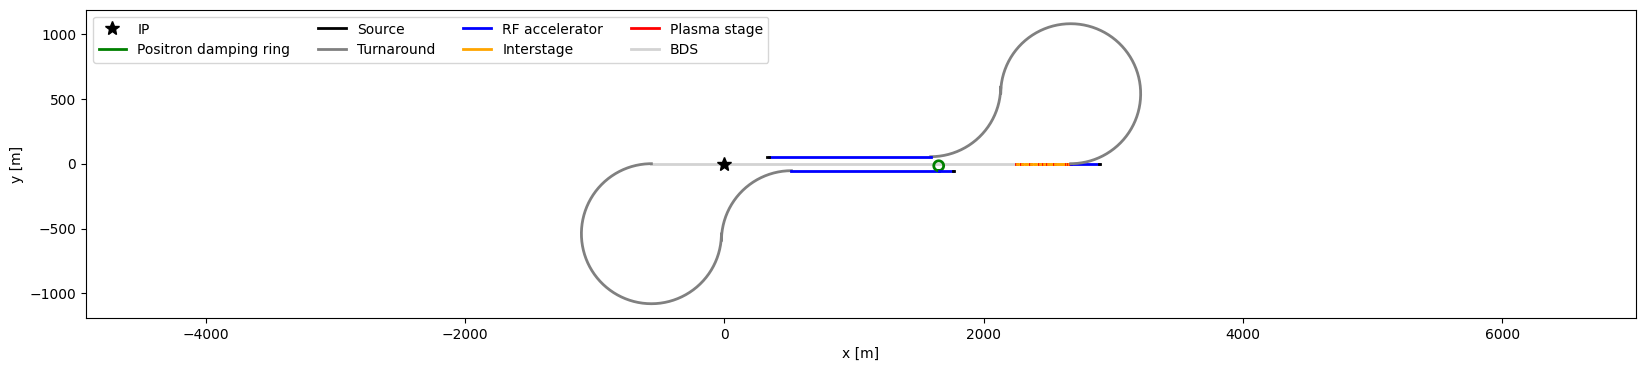

In [3]:
halhf1.plot_survey()

In [4]:
halhf1.print_cost()

-- COSTS -----------------------------------------
-- Construction: 3796 MILCU
   -- Electron arm (plasma): 2506 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 81 MILCU
         -- Instrumented beamline (29%): 3 MILCU
         -- RF structures (312x): 18 MILCU
         -- Klystrons (313x, 3 MW peak, 4 kW avg): 60 MILCU
      -- Driver complex: 2009 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 1563 MILCU
            -- Instrumented beamline (29%): 15 MILCU
            -- RF structures (1178x): 102 MILCU
            -- Klystrons (1179x, 28 MW peak, 40 kW avg): 1447 MILCU
         -- Turnaround: 94 MILCU
         -- Civil construction: 302 MILCU
      -- Plasma stages (16x): 23 MILCU
      -- Interstages: 33 MILCU
      -- BDS: 91 MILCU
      -- Civil construction: 174 MILCU
   -- Positron arm (RF): 1106 MILCU
      -- Source: 50 MILCU
      -- RF injector: 52 MILCU
         -- Instrumented beamline (29%): 1 MILCU
         -- RF structures (159x

## HALHF version 2.0 (baseline update)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε =  90.0/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  90.0/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  155.0 m) :   E =  20.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  90.4/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  162.1 m) :   E =  20.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  90.4/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  177.1 m) :   E =  35.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  90.6/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  187.0 m) :   E =  35.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  90.6/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  202.0 m) :   E =  50.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  90.7/0.3 mm-mrad
    ... #7  InterstageBasic         (s =  214.2 m) :   E 

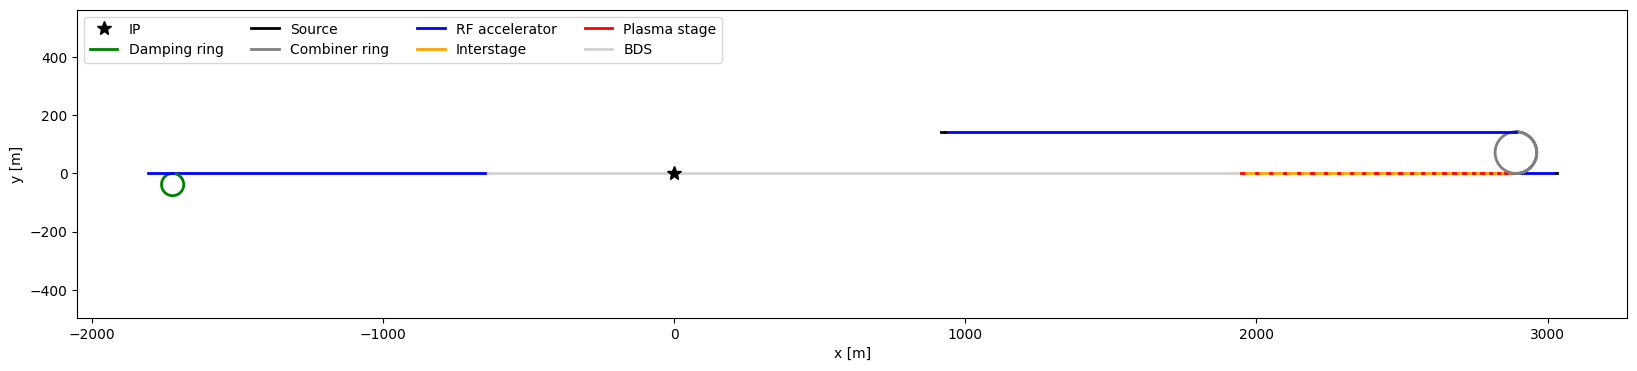

-- COSTS -----------------------------------------
-- Construction: 2530 MILCU
   -- PlasmaLinac: 1494 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 45 MILCU
         -- Instrumented beamline (10%): 1 MILCU
         -- RF structures (4927x): 14 MILCU
         -- Klystrons (29x, 48 MW peak, 26 kW avg): 30 MILCU
      -- Driver complex: 978 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 771 MILCU
            -- Instrumented beamline (25%): 20 MILCU
            -- RF structures (736x): 169 MILCU
            -- Klystrons (736x, 31 MW peak, 39 kW avg): 582 MILCU
         -- Combiner ring: 11 MILCU
         -- Civil construction: 145 MILCU
      -- Plasma stages (25x): 61 MILCU
      -- Interstages: 54 MILCU
      -- BDS: 79 MILCU
      -- Civil construction: 182 MILCU
   -- ConventionalLinac: 852 MILCU
      -- Polarized positron source: 192 MILCU
      -- RF injector: 36 MILCU
         -- Instrumented beamline (10%): 0 MILCU
         -- RF structu

In [12]:
halhf2 = HALHFv2()
halhf2.run('preset_example_HALHF2', overwrite=True, verbose=True)
halhf2.plot_survey()
halhf2.print_cost()
halhf2.print_power()

AttributeError: 'RFAcceleratorBasic' object has no attribute 'plot_power_profile'

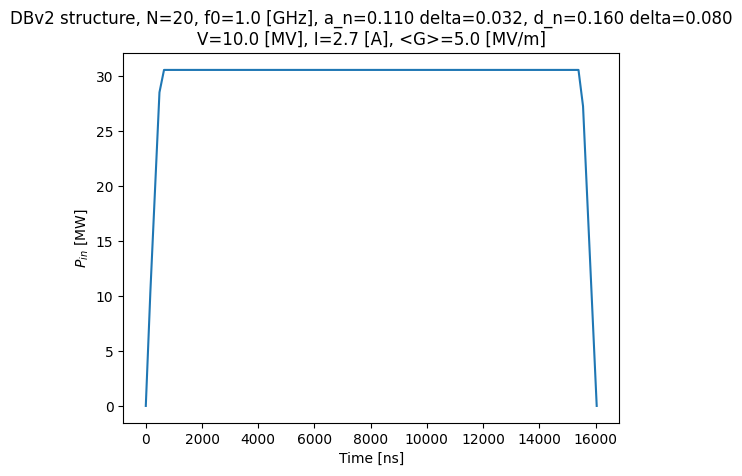

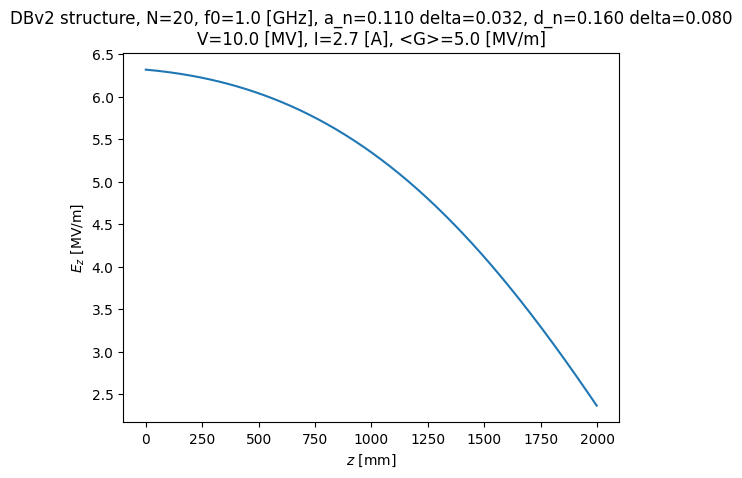

In [11]:
halhf2.linac1.driver_complex.rf_accelerator.plot_power_profile()
halhf2.linac1.driver_complex.rf_accelerator.plot_gradient_profile()

In [27]:
halhf2 = HALHFv2()
#halhf2.com_energy = 250e9
halhf2.optimize('halhf2_optimization', 
                    parameters=[{'name': 'energy_asymmetry', 'type': 'range', 'bounds': [2.0, 4.0], 'log_scale': True}, 
                                {'name': 'combiner_ring_compression_factor', 'type': 'range', 'bounds': [1, 5]},
                                {'name': 'driver_separation_num_buckets', 'type': 'range', 'bounds': [1, 10]},
                                {'name': 'driver_linac_gradient', 'type': 'range', 'bounds': [0.5e6, 10e6], 'log_scale': True},
                                {'name': 'pwfa_num_stages', 'type': 'range', 'bounds': [5, 50], 'log_scale': True}], 
                    merit_fcn=Collider.full_programme_cost,
                    label='Collider cost',
                    num_steps=50, parallel=False, overwrite=True)

[INFO 10-24 20:17:54] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter energy_asymmetry. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 10-24 20:17:54] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter combiner_ring_compression_factor. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 10-24 20:17:54] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter driver_separation_num_buckets. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 10-24 20:17:54] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter driver_linac_gradient. If that is not the expected value type, you can explici

>> SHOT 1/50
>> LINAC #1
>> SHOT 1/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε =  54.4/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  54.4/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  155.6 m) :   E =  20.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  54.6/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  162.8 m) :   E =  20.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  54.6/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  178.4 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  54.7/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  188.6 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  54.7/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  204.2 m) :   E =  51.9 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  54.8/0.2 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:17:56] ax.service.managed_loop: Running optimization trial 2...


>> SHOT 2/50
>> LINAC #1
>> SHOT 2/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =  96.8/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  96.8/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  158.3 m) :   E =  23.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  97.5/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  166.1 m) :   E =  23.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  97.5/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  184.4 m) :   E =  41.6 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  97.7/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  195.4 m) :   E =  41.6 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  97.7/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  213.7 m) :   E =  59.9 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  97.9/0.3 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:17:57] ax.service.managed_loop: Running optimization trial 3...


>> SHOT 3/50
>> LINAC #1
>> SHOT 3/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε = 151.0/0.5 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε = 151.0/0.5 mm-mrad
    ... #2  StageBasic #1           (s =  166.7 m) :   E =  31.7 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε = 152.0/0.5 mm-mrad
    ... #3  InterstageBasic         (s =  176.2 m) :   E =  31.7 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε = 152.0/0.5 mm-mrad
    ... #4  StageBasic #2           (s =  202.9 m) :   E =  58.5 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε = 152.4/0.5 mm-mrad
    ... #5  InterstageBasic         (s =  216.2 m) :   E =  58.5 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε = 152.4/0.5 mm-mrad
    ... #6  StageBasic #3           (s =  242.9 m) :   E =  85.2 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε = 152.6/0.5 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:17:59] ax.service.managed_loop: Running optimization trial 4...


>> SHOT 4/50
>> LINAC #1
>> SHOT 4/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε =  75.8/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  75.8/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  163.6 m) :   E =  28.6 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  76.5/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  172.4 m) :   E =  28.6 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  76.5/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  196.0 m) :   E =  52.2 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  76.7/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  208.5 m) :   E =  52.2 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  76.7/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  232.1 m) :   E =  75.8 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  76.8/0.2 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:18:00] ax.service.managed_loop: Running optimization trial 5...


>> SHOT 5/50
>> LINAC #1
>> SHOT 5/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  1.0%, ε =  49.7/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  0.0%, ε =  49.7/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  165.8 m) :   E =  30.7 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  0.0%, ε =  50.2/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  175.0 m) :   E =  30.7 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  0.0%, ε =  50.2/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  200.7 m) :   E =  56.5 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  0.0%, ε =  50.4/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  213.8 m) :   E =  56.5 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  0.0%, ε =  50.4/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  239.5 m) :   E =  82.2 GeV, Q = -1.60 nC, σz =  17.0 µm, σE =  0.0%, ε =  50.4/0.2 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:18:01] ax.service.managed_loop: Running optimization trial 6...


>> SHOT 6/50
>> LINAC #1
>> SHOT 6/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =  53.1/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.1/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  145.7 m) :   E =  10.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.2/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  150.0 m) :   E =  10.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.2/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  155.7 m) :   E =  16.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.3/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  161.8 m) :   E =  16.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.3/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  167.5 m) :   E =  22.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.4/0.2 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:18:04] ax.service.managed_loop: Running optimization trial 7...


>> SHOT 7/50
>> LINAC #1
>> SHOT 7/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =  89.3/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  89.3/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  148.5 m) :   E =  13.5 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  89.3/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  153.9 m) :   E =  13.5 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  89.3/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  162.4 m) :   E =  22.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  89.5/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  169.9 m) :   E =  22.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  89.5/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  178.4 m) :   E =  30.6 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  89.6/0.3 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:18:07] ax.service.managed_loop: Running optimization trial 8...


>> SHOT 8/50
>> LINAC #1
>> SHOT 8/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  1.0%, ε =  82.2/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  82.2/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  191.6 m) :   E =  56.6 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  82.0/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  204.7 m) :   E =  56.6 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  82.0/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  256.3 m) :   E = 108.2 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  82.1/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  274.7 m) :   E = 108.2 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  82.1/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  326.3 m) :   E = 159.8 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  82.1/0.3 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:18:08] ax.service.managed_loop: Running optimization trial 9...


>> SHOT 9/50
>> LINAC #1
>> SHOT 9/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  1.0%, ε = 132.6/0.5 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 132.6/0.5 mm-mrad
    ... #2  StageBasic #1           (s =  157.7 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 133.1/0.5 mm-mrad
    ... #3  InterstageBasic         (s =  165.4 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 133.1/0.5 mm-mrad
    ... #4  StageBasic #2           (s =  183.1 m) :   E =  40.4 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 133.4/0.5 mm-mrad
    ... #5  InterstageBasic         (s =  193.9 m) :   E =  40.4 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 133.4/0.5 mm-mrad
    ... #6  StageBasic #3           (s =  211.6 m) :   E =  58.1 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 133.6/0.5 mm-mrad
    ... #7  InterstageBasic    

[INFO 10-24 20:18:11] ax.service.managed_loop: Running optimization trial 10...


>> SHOT 10/50
>> LINAC #1
>> SHOT 10/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  1.1%, ε = 107.6/0.4 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 107.6/0.4 mm-mrad
    ... #2  StageBasic #1           (s =  156.0 m) :   E =  21.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 108.7/0.4 mm-mrad
    ... #3  InterstageBasic         (s =  163.3 m) :   E =  21.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 108.7/0.4 mm-mrad
    ... #4  StageBasic #2           (s =  179.4 m) :   E =  37.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 109.1/0.4 mm-mrad
    ... #5  InterstageBasic         (s =  189.6 m) :   E =  37.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 109.1/0.4 mm-mrad
    ... #6  StageBasic #3           (s =  205.7 m) :   E =  53.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 109.3/0.4 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:13] ax.service.managed_loop: Running optimization trial 11...


>> SHOT 11/50
>> LINAC #1
>> SHOT 11/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =  70.9/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  70.9/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  149.5 m) :   E =  14.5 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  71.0/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  155.1 m) :   E =  14.5 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  71.0/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  164.6 m) :   E =  24.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  71.1/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  172.6 m) :   E =  24.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  71.1/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  182.1 m) :   E =  33.5 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  71.2/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:16] ax.service.managed_loop: Running optimization trial 12...


>> SHOT 12/50
>> LINAC #1
>> SHOT 12/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =  47.2/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  47.2/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  149.1 m) :   E =  14.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  47.5/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  154.6 m) :   E =  14.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  47.5/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  163.7 m) :   E =  23.2 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  47.6/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  171.5 m) :   E =  23.2 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  47.6/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  180.5 m) :   E =  32.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  47.7/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:20] ax.service.managed_loop: Running optimization trial 13...


>> SHOT 13/50
>> LINAC #1
>> SHOT 13/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε =  59.2/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  59.2/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  149.6 m) :   E =  14.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  59.6/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  155.3 m) :   E =  14.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  59.6/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  164.9 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  59.8/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  172.9 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  59.8/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  182.5 m) :   E =  33.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  60.0/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:24] ax.service.managed_loop: Running optimization trial 14...


>> SHOT 14/50
>> LINAC #1
>> SHOT 14/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  1.0%, ε =  68.9/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  68.9/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  148.3 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  69.1/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  153.6 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  69.1/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  161.8 m) :   E =  21.6 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  69.3/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  169.3 m) :   E =  21.6 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  69.3/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  177.5 m) :   E =  29.9 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  69.5/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:29] ax.service.managed_loop: Running optimization trial 15...


>> SHOT 15/50
>> LINAC #1
>> SHOT 15/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =  81.6/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  81.6/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  155.3 m) :   E =  20.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  82.3/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  162.5 m) :   E =  20.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  82.3/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  177.8 m) :   E =  35.6 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  82.5/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  187.8 m) :   E =  35.6 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  82.5/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  203.2 m) :   E =  51.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  82.7/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:32] ax.service.managed_loop: Running optimization trial 16...


>> SHOT 16/50
>> LINAC #1
>> SHOT 16/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  1.0%, ε =  47.3/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  47.3/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  146.1 m) :   E =  11.1 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  47.4/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  150.6 m) :   E =  11.1 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  47.4/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  156.7 m) :   E =  17.2 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  47.5/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  163.1 m) :   E =  17.2 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  47.5/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  169.2 m) :   E =  23.3 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  47.6/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:38] ax.service.managed_loop: Running optimization trial 17...


>> SHOT 17/50
>> LINAC #1
>> SHOT 17/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =  68.4/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  68.4/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  147.3 m) :   E =  12.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  68.8/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  152.2 m) :   E =  12.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  68.8/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  159.5 m) :   E =  19.6 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  69.1/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  166.5 m) :   E =  19.6 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  69.1/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  173.8 m) :   E =  26.9 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  69.2/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:42] ax.service.managed_loop: Running optimization trial 18...


>> SHOT 18/50
>> LINAC #1
>> SHOT 18/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =  52.7/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  52.7/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  146.7 m) :   E =  11.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.0/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  151.4 m) :   E =  11.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.0/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  158.1 m) :   E =  18.4 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.2/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  164.8 m) :   E =  18.4 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.2/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  171.5 m) :   E =  25.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  53.3/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:46] ax.service.managed_loop: Running optimization trial 19...


>> SHOT 19/50
>> LINAC #1
>> SHOT 19/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  1.0%, ε =  51.4/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  51.4/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  148.3 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  51.5/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  153.5 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  51.5/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  161.8 m) :   E =  21.5 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  51.6/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  169.2 m) :   E =  21.5 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  51.6/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  177.4 m) :   E =  29.8 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  51.7/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:51] ax.service.managed_loop: Running optimization trial 20...


>> SHOT 20/50
>> LINAC #1
>> SHOT 20/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  1.0%, ε =  56.1/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  56.1/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  148.2 m) :   E =  13.2 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  56.5/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  153.4 m) :   E =  13.2 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  56.5/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  161.6 m) :   E =  21.4 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  56.7/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  169.0 m) :   E =  21.4 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  56.7/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  177.2 m) :   E =  29.6 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  56.9/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:18:55] ax.service.managed_loop: Running optimization trial 21...


>> SHOT 21/50
>> LINAC #1
>> SHOT 21/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε =  55.8/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  55.8/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  146.4 m) :   E =  11.4 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  56.0/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  151.0 m) :   E =  11.4 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  56.0/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  157.4 m) :   E =  17.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  56.2/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  164.0 m) :   E =  17.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  56.2/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  170.4 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  56.3/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:00] ax.service.managed_loop: Running optimization trial 22...


>> SHOT 22/50
>> LINAC #1
>> SHOT 22/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε =  41.7/0.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  41.7/0.1 mm-mrad
    ... #2  StageBasic #1           (s =  146.6 m) :   E =  11.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  41.9/0.1 mm-mrad
    ... #3  InterstageBasic         (s =  151.3 m) :   E =  11.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  41.9/0.1 mm-mrad
    ... #4  StageBasic #2           (s =  157.9 m) :   E =  18.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  42.0/0.1 mm-mrad
    ... #5  InterstageBasic         (s =  164.5 m) :   E =  18.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  42.0/0.1 mm-mrad
    ... #6  StageBasic #3           (s =  171.0 m) :   E =  24.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  42.1/0.1 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:04] ax.service.managed_loop: Running optimization trial 23...


>> SHOT 23/50
>> LINAC #1
>> SHOT 23/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε =  85.0/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  85.0/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  150.5 m) :   E =  15.5 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  85.3/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  156.4 m) :   E =  15.5 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  85.3/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  166.9 m) :   E =  26.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  85.6/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  175.2 m) :   E =  26.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  85.6/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  185.7 m) :   E =  36.4 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  85.7/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:09] ax.service.managed_loop: Running optimization trial 24...


>> SHOT 24/50
>> LINAC #1
>> SHOT 24/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =  77.7/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  77.7/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  146.9 m) :   E =  11.9 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  77.8/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  151.7 m) :   E =  11.9 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  77.8/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  158.5 m) :   E =  18.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  78.0/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  165.3 m) :   E =  18.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  78.0/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  172.1 m) :   E =  25.6 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  78.1/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:14] ax.service.managed_loop: Running optimization trial 25...


>> SHOT 25/50
>> LINAC #1
>> SHOT 25/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  1.0%, ε =  59.2/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  59.2/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  147.4 m) :   E =  12.4 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  59.1/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  152.3 m) :   E =  12.4 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  59.1/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  159.7 m) :   E =  19.7 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  59.2/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  166.7 m) :   E =  19.7 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  59.2/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  174.0 m) :   E =  27.1 GeV, Q = -1.60 nC, σz =  18.7 µm, σE =  0.0%, ε =  59.3/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:18] ax.service.managed_loop: Running optimization trial 26...


>> SHOT 26/50
>> LINAC #1
>> SHOT 26/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε =  61.2/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  61.2/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  148.3 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  61.7/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  153.6 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  61.8/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  161.9 m) :   E =  21.7 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  62.0/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  169.4 m) :   E =  21.7 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  62.0/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  177.7 m) :   E =  30.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  62.2/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:24] ax.service.managed_loop: Running optimization trial 27...


>> SHOT 27/50
>> LINAC #1
>> SHOT 27/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  1.0%, ε =  41.6/0.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε =  41.6/0.1 mm-mrad
    ... #2  StageBasic #1           (s =  145.0 m) :   E =  10.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε =  41.6/0.1 mm-mrad
    ... #3  InterstageBasic         (s =  149.1 m) :   E =  10.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε =  41.6/0.1 mm-mrad
    ... #4  StageBasic #2           (s =  154.1 m) :   E =  15.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε =  41.6/0.1 mm-mrad
    ... #5  InterstageBasic         (s =  159.9 m) :   E =  15.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε =  41.6/0.1 mm-mrad
    ... #6  StageBasic #3           (s =  164.9 m) :   E =  20.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε =  41.7/0.1 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:29] ax.service.managed_loop: Running optimization trial 28...


>> SHOT 28/50
>> LINAC #1
>> SHOT 28/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  1.0%, ε =  38.2/0.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε =  38.2/0.1 mm-mrad
    ... #2  StageBasic #1           (s =  145.0 m) :   E =  10.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε =  38.3/0.1 mm-mrad
    ... #3  InterstageBasic         (s =  149.1 m) :   E =  10.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε =  38.3/0.1 mm-mrad
    ... #4  StageBasic #2           (s =  154.1 m) :   E =  15.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε =  38.4/0.1 mm-mrad
    ... #5  InterstageBasic         (s =  159.9 m) :   E =  15.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε =  38.4/0.1 mm-mrad
    ... #6  StageBasic #3           (s =  164.9 m) :   E =  20.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε =  38.5/0.1 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:35] ax.service.managed_loop: Running optimization trial 29...


>> SHOT 29/50
>> LINAC #1
>> SHOT 29/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε =  41.9/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  41.9/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  148.1 m) :   E =  13.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  42.0/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  153.3 m) :   E =  13.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  42.0/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  161.4 m) :   E =  21.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  42.1/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  168.7 m) :   E =  21.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  42.1/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  176.8 m) :   E =  29.3 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  42.2/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:42] ax.service.managed_loop: Running optimization trial 30...


>> SHOT 30/50
>> LINAC #1
>> SHOT 30/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε =  57.0/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  57.0/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  146.8 m) :   E =  11.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  57.0/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  151.6 m) :   E =  11.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  57.0/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  158.4 m) :   E =  18.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  57.0/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  165.2 m) :   E =  18.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  57.0/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  172.0 m) :   E =  25.5 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  57.1/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:47] ax.service.managed_loop: Running optimization trial 31...


>> SHOT 31/50
>> LINAC #1
>> SHOT 31/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε = 109.3/0.4 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 109.3/0.4 mm-mrad
    ... #2  StageBasic #1           (s =  149.4 m) :   E =  14.4 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 109.6/0.4 mm-mrad
    ... #3  InterstageBasic         (s =  155.0 m) :   E =  14.4 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 109.6/0.4 mm-mrad
    ... #4  StageBasic #2           (s =  164.3 m) :   E =  23.8 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 109.8/0.4 mm-mrad
    ... #5  InterstageBasic         (s =  172.2 m) :   E =  23.8 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 109.8/0.4 mm-mrad
    ... #6  StageBasic #3           (s =  181.6 m) :   E =  33.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε = 110.0/0.4 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:52] ax.service.managed_loop: Running optimization trial 32...


>> SHOT 32/50
>> LINAC #1
>> SHOT 32/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε = 152.7/0.5 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε = 152.7/0.5 mm-mrad
    ... #2  StageBasic #1           (s =  151.7 m) :   E =  16.7 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε = 152.6/0.5 mm-mrad
    ... #3  InterstageBasic         (s =  158.0 m) :   E =  16.7 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε = 152.6/0.5 mm-mrad
    ... #4  StageBasic #2           (s =  169.7 m) :   E =  28.5 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε = 152.9/0.5 mm-mrad
    ... #5  InterstageBasic         (s =  178.5 m) :   E =  28.5 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε = 152.9/0.5 mm-mrad
    ... #6  StageBasic #3           (s =  190.3 m) :   E =  40.2 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε = 153.0/0.5 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:19:59] ax.service.managed_loop: Running optimization trial 33...


>> SHOT 33/50
>> LINAC #1
>> SHOT 33/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε =  90.2/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  90.2/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  151.3 m) :   E =  16.3 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  90.6/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  157.5 m) :   E =  16.3 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  90.6/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  168.8 m) :   E =  27.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  90.8/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  177.5 m) :   E =  27.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  90.8/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  188.8 m) :   E =  39.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.0%, ε =  90.9/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:05] ax.service.managed_loop: Running optimization trial 34...


>> SHOT 34/50
>> LINAC #1
>> SHOT 34/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.1%, ε =  76.8/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  76.8/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  147.2 m) :   E =  12.2 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  77.1/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  152.1 m) :   E =  12.2 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  77.1/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  159.3 m) :   E =  19.4 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  77.3/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  166.2 m) :   E =  19.4 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  77.3/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  173.4 m) :   E =  26.6 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  77.4/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:10] ax.service.managed_loop: Running optimization trial 35...


>> SHOT 35/50
>> LINAC #1
>> SHOT 35/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε =  40.8/0.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  40.8/0.1 mm-mrad
    ... #2  StageBasic #1           (s =  148.3 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  40.9/0.1 mm-mrad
    ... #3  InterstageBasic         (s =  153.6 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  40.9/0.1 mm-mrad
    ... #4  StageBasic #2           (s =  161.9 m) :   E =  21.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  41.0/0.1 mm-mrad
    ... #5  InterstageBasic         (s =  169.4 m) :   E =  21.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  41.0/0.1 mm-mrad
    ... #6  StageBasic #3           (s =  177.7 m) :   E =  30.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε =  41.0/0.1 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:16] ax.service.managed_loop: Running optimization trial 36...


>> SHOT 36/50
>> LINAC #1
>> SHOT 36/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε =  81.8/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  81.8/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  148.9 m) :   E =  13.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  82.0/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  154.3 m) :   E =  13.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  82.0/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  163.2 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  82.1/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  170.8 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  82.1/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  179.7 m) :   E =  31.6 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  82.2/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:22] ax.service.managed_loop: Running optimization trial 37...


>> SHOT 37/50
>> LINAC #1
>> SHOT 37/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε =  66.6/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε =  66.6/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  149.9 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε =  66.8/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  155.7 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε =  66.8/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  165.6 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε =  67.0/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  173.7 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε =  67.0/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  183.6 m) :   E =  34.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.0%, ε =  67.1/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:28] ax.service.managed_loop: Running optimization trial 38...


>> SHOT 38/50
>> LINAC #1
>> SHOT 38/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  1.0%, ε = 113.9/0.4 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 113.9/0.4 mm-mrad
    ... #2  StageBasic #1           (s =  148.4 m) :   E =  13.4 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 114.0/0.4 mm-mrad
    ... #3  InterstageBasic         (s =  153.7 m) :   E =  13.4 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 114.0/0.4 mm-mrad
    ... #4  StageBasic #2           (s =  162.1 m) :   E =  21.8 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 114.2/0.4 mm-mrad
    ... #5  InterstageBasic         (s =  169.6 m) :   E =  21.8 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 114.2/0.4 mm-mrad
    ... #6  StageBasic #3           (s =  178.0 m) :   E =  30.2 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 114.4/0.4 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:33] ax.service.managed_loop: Running optimization trial 39...


>> SHOT 39/50
>> LINAC #1
>> SHOT 39/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  1.0%, ε =  77.5/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  0.0%, ε =  77.5/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  147.1 m) :   E =  12.1 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  0.0%, ε =  77.5/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  151.9 m) :   E =  12.1 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  0.0%, ε =  77.5/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  159.0 m) :   E =  19.1 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  0.0%, ε =  77.6/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  165.8 m) :   E =  19.1 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  0.0%, ε =  77.6/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  172.9 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  18.8 µm, σE =  0.0%, ε =  77.7/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:39] ax.service.managed_loop: Running optimization trial 40...


>> SHOT 40/50
>> LINAC #1
>> SHOT 40/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε =  98.3/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  98.3/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  155.8 m) :   E =  20.8 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  98.3/0.4 mm-mrad
    ... #3  InterstageBasic         (s =  163.0 m) :   E =  20.8 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  98.3/0.4 mm-mrad
    ... #4  StageBasic #2           (s =  178.8 m) :   E =  36.6 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  98.4/0.4 mm-mrad
    ... #5  InterstageBasic         (s =  189.0 m) :   E =  36.6 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  98.4/0.4 mm-mrad
    ... #6  StageBasic #3           (s =  204.8 m) :   E =  52.4 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  98.5/0.4 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:44] ax.service.managed_loop: Running optimization trial 41...


>> SHOT 41/50
>> LINAC #1
>> SHOT 41/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε =  81.2/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  81.2/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  153.4 m) :   E =  18.4 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  81.7/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  160.1 m) :   E =  18.4 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  81.7/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  173.5 m) :   E =  31.8 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  81.9/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  182.9 m) :   E =  31.8 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  81.9/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  196.3 m) :   E =  45.2 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  82.1/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:50] ax.service.managed_loop: Running optimization trial 42...


>> SHOT 42/50
>> LINAC #1
>> SHOT 42/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε = 164.1/0.6 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 164.1/0.6 mm-mrad
    ... #2  StageBasic #1           (s =  150.0 m) :   E =  15.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 164.4/0.6 mm-mrad
    ... #3  InterstageBasic         (s =  155.8 m) :   E =  15.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 164.4/0.6 mm-mrad
    ... #4  StageBasic #2           (s =  165.8 m) :   E =  25.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 164.8/0.6 mm-mrad
    ... #5  InterstageBasic         (s =  173.9 m) :   E =  25.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 164.8/0.6 mm-mrad
    ... #6  StageBasic #3           (s =  183.9 m) :   E =  35.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.0/0.6 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:20:56] ax.service.managed_loop: Running optimization trial 43...


>> SHOT 43/50
>> LINAC #1
>> SHOT 43/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  1.0%, ε =  55.6/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  55.6/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  147.4 m) :   E =  12.4 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  55.6/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  152.3 m) :   E =  12.4 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  55.6/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  159.7 m) :   E =  19.8 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  55.7/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  166.7 m) :   E =  19.8 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  55.7/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  174.1 m) :   E =  27.1 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.0%, ε =  55.8/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:03] ax.service.managed_loop: Running optimization trial 44...


>> SHOT 44/50
>> LINAC #1
>> SHOT 44/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε =  58.0/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  58.0/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  146.4 m) :   E =  11.4 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  58.1/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  151.0 m) :   E =  11.4 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  58.1/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  157.4 m) :   E =  17.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  58.2/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  163.9 m) :   E =  17.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  58.2/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  170.2 m) :   E =  24.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.0%, ε =  58.3/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:08] ax.service.managed_loop: Running optimization trial 45...


>> SHOT 45/50
>> LINAC #1
>> SHOT 45/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  1.0%, ε =  73.9/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.0%, ε =  73.9/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  147.8 m) :   E =  12.8 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.0%, ε =  74.0/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  152.9 m) :   E =  12.8 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.0%, ε =  74.0/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  160.7 m) :   E =  20.6 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.0%, ε =  74.1/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  167.9 m) :   E =  20.6 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.0%, ε =  74.1/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  175.7 m) :   E =  28.4 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.0%, ε =  74.2/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:13] ax.service.managed_loop: Running optimization trial 46...


>> SHOT 46/50
>> LINAC #1
>> SHOT 46/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  1.0%, ε =  75.2/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  75.2/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  147.6 m) :   E =  12.6 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  75.4/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  152.7 m) :   E =  12.6 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  75.4/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  160.3 m) :   E =  20.2 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  75.7/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  167.4 m) :   E =  20.2 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  75.7/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  175.0 m) :   E =  27.8 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε =  75.8/0.3 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:18] ax.service.managed_loop: Running optimization trial 47...


>> SHOT 47/50
>> LINAC #1
>> SHOT 47/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  1.0%, ε = 144.2/0.5 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 144.2/0.5 mm-mrad
    ... #2  StageBasic #1           (s =  149.6 m) :   E =  14.5 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 144.0/0.5 mm-mrad
    ... #3  InterstageBasic         (s =  155.2 m) :   E =  14.5 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 144.0/0.5 mm-mrad
    ... #4  StageBasic #2           (s =  164.7 m) :   E =  24.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 144.2/0.5 mm-mrad
    ... #5  InterstageBasic         (s =  172.7 m) :   E =  24.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 144.2/0.5 mm-mrad
    ... #6  StageBasic #3           (s =  182.3 m) :   E =  33.6 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.0%, ε = 144.3/0.5 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:21] ax.service.managed_loop: Running optimization trial 48...


>> SHOT 48/50
>> LINAC #1
>> SHOT 48/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε =  52.5/0.2 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  52.5/0.2 mm-mrad
    ... #2  StageBasic #1           (s =  146.5 m) :   E =  11.5 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  52.5/0.2 mm-mrad
    ... #3  InterstageBasic         (s =  151.2 m) :   E =  11.5 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  52.5/0.2 mm-mrad
    ... #4  StageBasic #2           (s =  157.7 m) :   E =  18.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  52.6/0.2 mm-mrad
    ... #5  InterstageBasic         (s =  164.2 m) :   E =  18.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  52.6/0.2 mm-mrad
    ... #6  StageBasic #3           (s =  170.7 m) :   E =  24.5 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.0%, ε =  52.7/0.2 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:27] ax.service.managed_loop: Running optimization trial 49...


>> SHOT 49/50
>> LINAC #1
>> SHOT 49/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =  41.0/0.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  41.0/0.1 mm-mrad
    ... #2  StageBasic #1           (s =  152.8 m) :   E =  17.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  41.1/0.1 mm-mrad
    ... #3  InterstageBasic         (s =  159.3 m) :   E =  17.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  41.1/0.1 mm-mrad
    ... #4  StageBasic #2           (s =  172.0 m) :   E =  30.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  41.2/0.1 mm-mrad
    ... #5  InterstageBasic         (s =  181.2 m) :   E =  30.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  41.2/0.1 mm-mrad
    ... #6  StageBasic #3           (s =  193.9 m) :   E =  43.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =  41.3/0.1 mm-mrad
    ... #7  InterstageBasic  

[INFO 10-24 20:21:32] ax.service.managed_loop: Running optimization trial 50...


>> SHOT 50/50
>> LINAC #1
>> SHOT 50/50
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  1.0%, ε =  78.3/0.3 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  140.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  78.3/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  148.3 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  78.6/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  153.6 m) :   E =  13.3 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  78.6/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  161.9 m) :   E =  21.7 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  78.9/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  169.4 m) :   E =  21.7 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  78.8/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  177.7 m) :   E =  30.0 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.0%, ε =  79.0/0.3 mm-mrad
    ... #7  InterstageBasic  

({'energy_asymmetry': 2.8015891428339397,
  'combiner_ring_compression_factor': 5,
  'driver_separation_num_buckets': 3,
  'driver_linac_gradient': 4366797.034949418,
  'pwfa_num_stages': 46},
 ({'objective': 87067236.68768956},
  {'objective': {'objective': 81883433318.41966}}))

>> EVENT 1-1: Luminosity (full/peak/geom.): 1.58 / 1.58 / 1.6 μb^-1


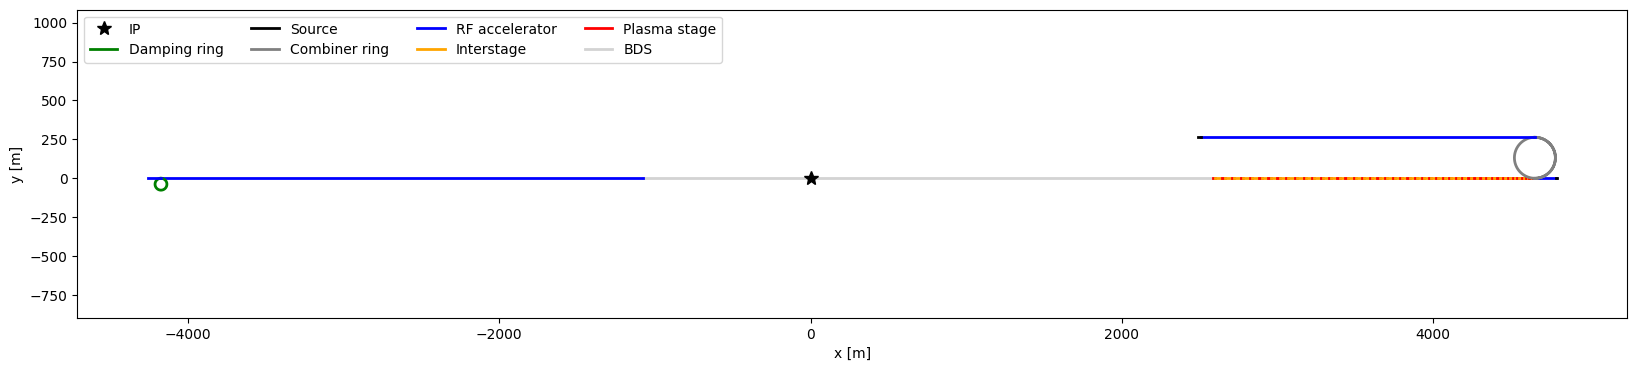

-- COSTS -----------------------------------------
-- Construction: 3887 MILCU
   -- PlasmaLinac: 1845 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 47 MILCU
         -- Instrumented beamline (10%): 1 MILCU
         -- RF structures (4927x): 14 MILCU
         -- Klystrons (29x, 40 MW peak, 32 kW avg): 33 MILCU
      -- Driver complex: 1067 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 817 MILCU
            -- Instrumented beamline (25%): 22 MILCU
            -- RF structures (805x): 185 MILCU
            -- Klystrons (806x, 26 MW peak, 59 kW avg): 610 MILCU
         -- Combiner ring: 21 MILCU
         -- Civil construction: 179 MILCU
      -- Plasma stages (46x): 109 MILCU
      -- Interstages: 134 MILCU
      -- BDS: 105 MILCU
      -- Civil construction: 288 MILCU
   -- ConventionalLinac: 1859 MILCU
      -- Polarized positron source: 192 MILCU
      -- RF injector: 35 MILCU
         -- Instrumented beamline (10%): 0 MILCU
         -- RF st

In [33]:
halhf2 = HALHFv2()
#halhf2.com_energy = 550e9
halhf2.energy_asymmetry = 2.4015891428339397
halhf2.combiner_ring_compression_factor = 5
halhf2.driver_separation_num_buckets = 3
halhf2.driver_linac_gradient = 4366797.0
halhf2.pwfa_num_stages = 46
halhf2.run('preset_example_HALHF2', overwrite=True, verbose=False)
halhf2.plot_survey()
halhf2.print_cost()
halhf2.print_power()

>> EVENT 1-1: Luminosity (full/peak/geom.): 0.572 / 0.572 / 0.57 μb^-1


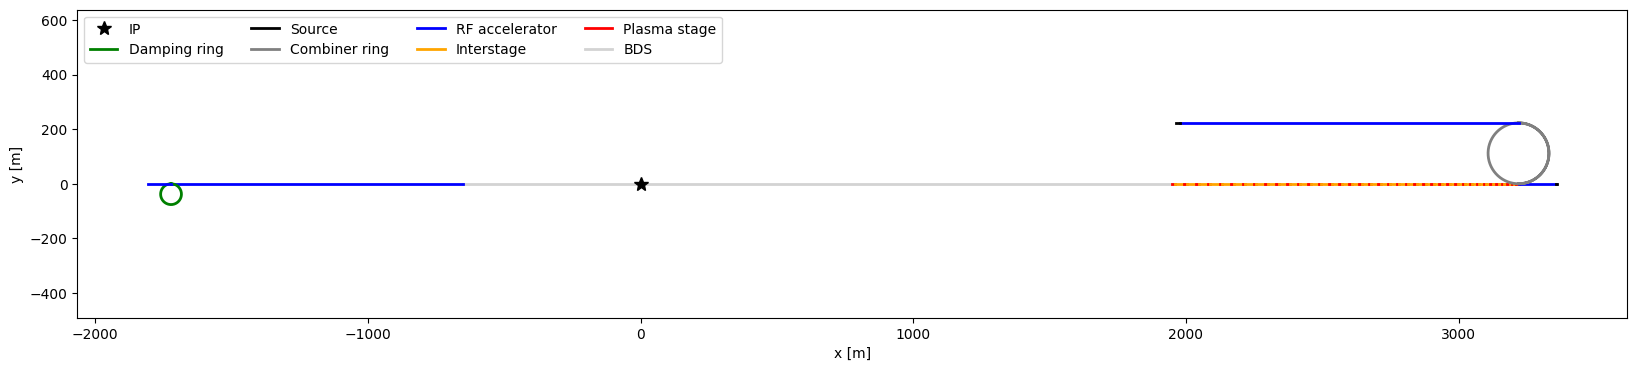

-- COSTS -----------------------------------------
-- Construction: 2309 MILCU
   -- PlasmaLinac: 1285 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 47 MILCU
         -- Instrumented beamline (10%): 1 MILCU
         -- RF structures (4927x): 14 MILCU
         -- Klystrons (29x, 42 MW peak, 30 kW avg): 32 MILCU
      -- Driver complex: 703 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 518 MILCU
            -- Instrumented beamline (25%): 13 MILCU
            -- RF structures (466x): 107 MILCU
            -- Klystrons (467x, 31 MW peak, 60 kW avg): 398 MILCU
         -- Combiner ring: 18 MILCU
         -- Civil construction: 118 MILCU
      -- Plasma stages (39x): 75 MILCU
      -- Interstages: 85 MILCU
      -- BDS: 79 MILCU
      -- Civil construction: 202 MILCU
   -- ConventionalLinac: 839 MILCU
      -- Polarized positron source: 192 MILCU
      -- RF injector: 35 MILCU
         -- Instrumented beamline (10%): 0 MILCU
         -- RF structu

In [32]:
halhf2 = HALHFv2()
halhf2.energy_asymmetry = 3
halhf2.pwfa_num_stages = 39
halhf2.run('preset_example_HALHF2', overwrite=True, verbose=False)
halhf2.plot_survey()
halhf2.print_cost()
halhf2.print_power()
print(halhf2.full_programme_cost())

## Cool Copper Collider

>> LINAC #1
Tracked #0  SourceBasic             (s =    0.0 m) :   E =   0.1 GeV, Q = -1.60 nC, σz = 101.4 µm, σE =  0.2%, ε =  97.4/99.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =   97.5 m) :   E =   3.0 GeV, Q = -1.60 nC, σz = 101.4 µm, σE =  0.0%, ε =  97.4/99.0 mm-mrad
    ... #2  DampingRingBasic        (s =   97.5 m) :   E =   3.0 GeV, Q = -1.60 nC, σz = 101.4 µm, σE =  0.0%, ε =   0.9/0.0 mm-mrad
    ... #3  RFAcceleratorBasic      (s = 2034.0 m) :   E = 125.0 GeV, Q = -1.60 nC, σz = 101.4 µm, σE =  0.0%, ε =   0.9/0.0 mm-mrad
    ... #4  BeamDeliverySystemBasic (s = 3234.0 m) :   E = 125.0 GeV, Q = -1.60 nC, σz = 101.4 µm, σE =  0.0%, ε =   0.9/0.0 mm-mrad
>> LINAC #2
Tracked #0  SourceBasic             (s =    0.0 m) :   E =   0.1 GeV, Q =  1.60 nC, σz = 100.3 µm, σE =  0.2%, ε =  99.5/101.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =   97.5 m) :   E =   3.0 GeV, Q =  1.60 nC, σz = 100.3 µm, σE =  0.0%, ε =  99.5/101.1 mm-mrad
    ... #2  DampingRingBasic        (s 

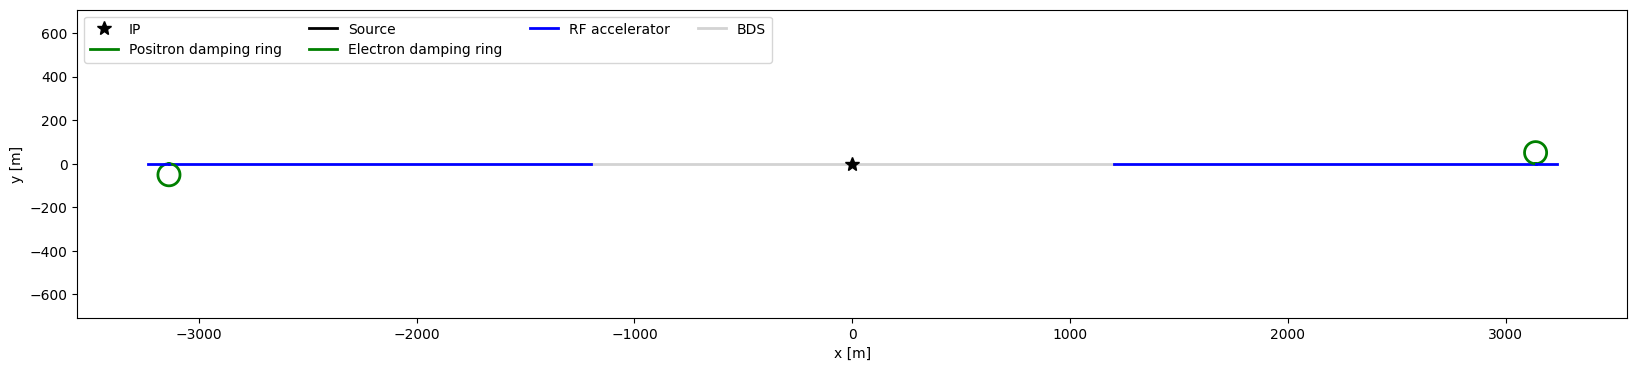

-- COSTS -----------------------------------------
-- Construction: 3324 MILCU
   -- Electron arm: 1522 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 33 MILCU
         -- Instrumented beamline (10%): 0 MILCU
         -- RF structures (3343x): 10 MILCU
         -- Klystrons (26x, 52 MW peak, 18 kW avg): 23 MILCU
      -- Electron damping ring: 36 MILCU
         -- Ring components: 16 MILCU
         -- Civil construction: 19 MILCU
      -- RF accelerator: 1115 MILCU
         -- Instrumented beamline (10%): 8 MILCU
         -- RF structures (132828x): 200 MILCU
         -- Klystrons (1022x, 63 MW peak, 14 kW avg): 906 MILCU
      -- BDS: 49 MILCU
      -- Civil construction: 194 MILCU
   -- Positron arm: 1618 MILCU
      -- Polarized positron source: 192 MILCU
      -- RF injector: 33 MILCU
         -- Instrumented beamline (10%): 0 MILCU
         -- RF structures (3343x): 10 MILCU
         -- Klystrons (26x, 52 MW peak, 18 kW avg): 23 MILCU
      -- Positron da

In [24]:
cool_copper_collider = C3()
cool_copper_collider.run('preset_example_C3', overwrite=True)
cool_copper_collider.plot_survey()
cool_copper_collider.print_cost()